# Import Statements

In [5]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One Hot Encoding the Target Classes

In [6]:
encoder = OneHotEncoder()

In [7]:
# Define the path to the output folder containing sentiment subfolders
output_folder = 'imagesSorted'  # Update this to your folder path

# Initialize a set to store unique labels
labels = set()

# Iterate through each subfolder in the output folder
for folder_name in os.listdir(output_folder):
    folder_path = os.path.join(output_folder, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Add folder name to the set of labels
        labels.add(folder_name)

# Convert the set of labels to a list (optional, if you need a list)
labels = list(labels)

print("Labels found in output folders:")
print(labels)

Labels found in output folders:
['neutral', 'happiness', 'disgust', 'surprise', 'sadness', 'contempt', 'anger', 'fear']


# Creating 3 Important Lists --
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor

In [8]:
# Define paths
base_folder = 'imagesSorted'  # Update this path to your output folder

# Initialize lists
data = []
result = []

# Initialize OneHotEncoder with explicit categories
encoder = OneHotEncoder(categories=[labels], sparse=False)

# Fit the encoder on the list of labels
encoder.fit(np.array(labels).reshape(-1, 1))

# Iterate through each sentiment folder
for sentiment_folder in os.listdir(base_folder):
    sentiment_folder_path = os.path.join(base_folder, sentiment_folder)
    print(sentiment_folder)
    if os.path.isdir(sentiment_folder_path):
        # Get all image file paths
        for file_name in os.listdir(sentiment_folder_path):
            if file_name.lower().endswith('.jpg'):
                file_path = os.path.join(sentiment_folder_path, file_name)
                # Open, resize, and process the image
                img = Image.open(file_path)
                img = img.resize((128, 128))
                img = img.convert('RGB')
                img_array = np.array(img)

                if img_array.shape == (128, 128,3):
                    data.append(img_array)

                    # Transform sentiment to one-hot encoded format
                    sentiment_encoded = encoder.transform([[sentiment_folder]])
                    result.append(sentiment_encoded)
                else:
                    print(img_array.shape)


# Convert lists to numpy arrays if needed
data = np.array(data)
result = np.array(result)

print("Data and result lists have been populated.")


surprise


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


fear
happiness
neutral
contempt
disgust
anger
sadness
Data and result lists have been populated.


In [9]:
data = np.array(data)
data.shape

(13682, 128, 128, 3)

In [10]:
result = np.array(result)
result = result.reshape(13682,8)

# Splitting the Data into Training & Testing

In [11]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (10945, 128, 128, 3)
x_test shape: (2737, 128, 128, 3)


# Model Building

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [13]:
y_train.shape

(10945, 8)

In [14]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
274/274 [==============================] - 121s 438ms/step - loss: 3.0008 - val_loss: 0.8546
Epoch 2/30
274/274 [==============================] - 120s 436ms/step - loss: 0.8174 - val_loss: 0.7510
Epoch 3/30
274/274 [==============================] - 119s 434ms/step - loss: 0.7181 - val_loss: 0.9214
Epoch 4/30
274/274 [==============================] - 118s 432ms/step - loss: 0.6727 - val_loss: 0.7622
Epoch 5/30
274/274 [==============================] - 119s 435ms/step - loss: 0.6343 - val_loss: 0.9973
Epoch 6/30
274/274 [==============================] - 119s 436ms/step - loss: 0.5840 - val_loss: 0.8163
Epoch 7/30
274/274 [==============================] - 118s 431ms/step - loss: 0.5563 - val_loss: 0.7622
Epoch 8/30
274/274 [==============================] - 118s 431ms/step - loss: 0.5052 - val_loss: 0.7003
Epoch 9/30
274/274 [==============================] - 117s 427ms/step - loss: 0.4677 - val_loss: 0.6678
Epoch 10/30
274/274 [==============================] - 117s 428m

# Plotting Losses

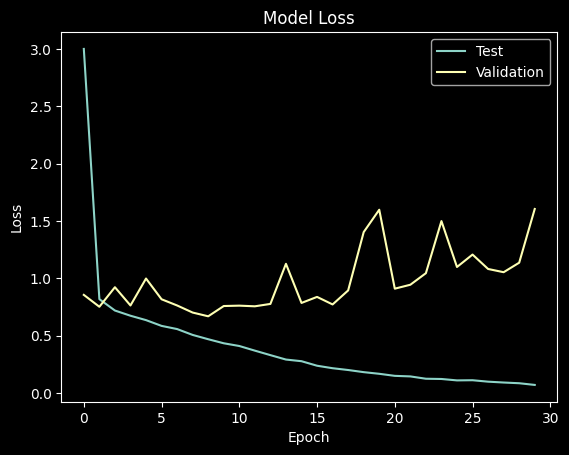

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Just Checking the Model

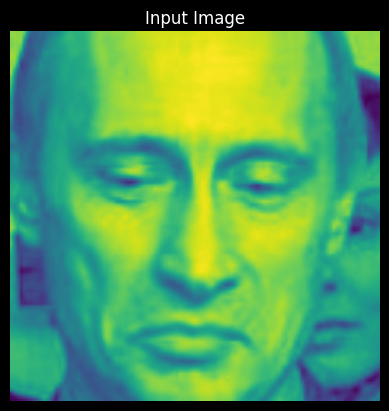

Predicted emotion: neutral
Prediction probabilities: [9.9964583e-01 2.9109317e-06 1.8648216e-23 1.3990680e-19 3.5126912e-04
 5.4507541e-33 2.8769309e-17 2.1848169e-24]
Confidence for neutral: 0.9996
Confidence for happiness: 0.0000
Confidence for disgust: 0.0000
Confidence for surprise: 0.0000
Confidence for sadness: 0.0004
Confidence for contempt: 0.0000
Confidence for anger: 0.0000
Confidence for fear: 0.0000
Confidence of predicted emotion (neutral): 0.9996


In [30]:
from matplotlib.pyplot import imshow
img = Image.open("imagesSorted/sadness/Vladimir_Putin_0043.jpg")
x = np.array(img.resize((128,128)).convert('RGB'))

x = x.reshape(1, 128, 128, 3)
res = model.predict_on_batch(x)

# Display the image
plt.imshow(img)
plt.title("Input Image")
plt.axis('off')
plt.show()

# Get the index of the maximum probability
predicted_class_index = np.argmax(res[0])
predicted_emotion = labels[predicted_class_index]

# Get confidence scores (probabilities)
confidence_scores = res[0]

# Print the prediction and confidence
print(f"Predicted emotion: {predicted_emotion}")
print(f"Prediction probabilities: {confidence_scores}")

# Print confidence for each emotion
for label, confidence in zip(labels, confidence_scores):
    print(f"Confidence for {label}: {confidence:.4f}")

# Print confidence of the predicted emotion
confidence = confidence_scores[predicted_class_index]
print(f"Confidence of predicted emotion ({predicted_emotion}): {confidence:.4f}")


In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"input/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

In [ ]:
!unzip data


# Thats It !!